# Netflix Data Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("Desktop/Projects Data_set/netflix_titles.csv")

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Feature Engineering

In [16]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
data["director"].fillna("None",inplace=True)

In [22]:
data["cast"].fillna("None",inplace=True)

In [33]:
data["date_added"].fillna(0,inplace=True)

In [52]:
data["rating"].drop(data[data["rating"].isnull()].index,axis=0,inplace=True)

In [53]:
data["duration"].drop(data[data["duration"].isnull()].index,axis=0,inplace=True)

In [66]:
index1 = data[data["rating"].isnull()]["rating"].index
index2 = data[data["duration"].isnull()]["duration"].index
data.drop(index1,axis=0,inplace=True)
data.drop(index2,axis=0,inplace=True)

In [68]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [72]:
data.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8800,8800,8800,8800,8800,8800,8800,8800,8800,8800,8800
unique,8800,2,8800,4527,7689,749,1766,14,220,514,8768
top,s1,Movie,Dick Johnson Is Dead,None,None,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6126,1,2631,825,2815,109,3207,1791,362,4


In [73]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### EDA

### Let's analyse the trend of type of shows released over the years

<AxesSubplot:title={'center':'Movies Vs TV Show'}, ylabel='type'>

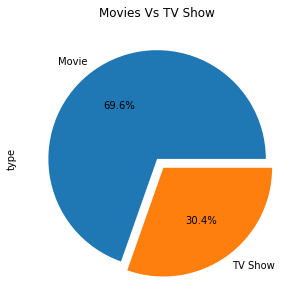

In [85]:
data["type"].value_counts().plot(kind="pie",figsize=(8,5),title="Movies Vs TV Show",autopct="%1.1f%%",explode=(0,0.1))

<AxesSubplot:title={'center':'TV Shows released over the years'}, xlabel='release_year'>

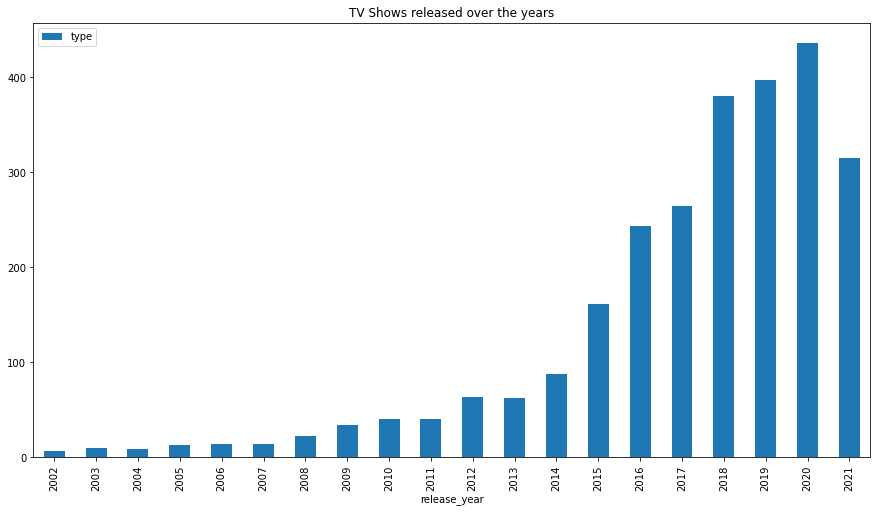

In [134]:
data[data["type"] == "TV Show"][["type","release_year"]].groupby(["release_year"]).count().tail(20).plot(
    kind="bar",
    figsize=(15,8),
    title ="TV Shows released over the years")

<AxesSubplot:title={'center':'Movies released over the year'}, xlabel='release_year'>

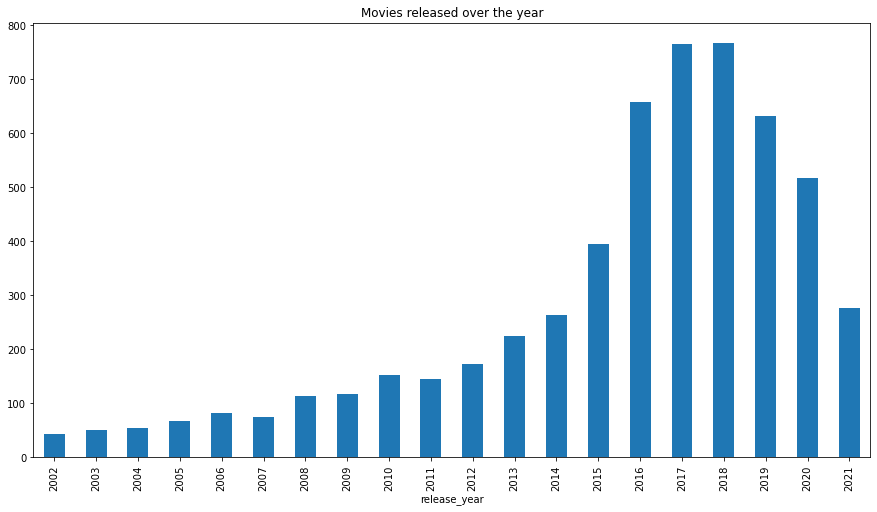

In [135]:
data[data["type"] == "Movie"][["type","release_year"]].groupby(["release_year"])["type"].count().tail(20).plot(
    kind="bar",
    figsize=(15,8),
    title = "Movies released over the year")

### Top 10 Countries with most TV Shows and Movies Combined

<AxesSubplot:title={'center':'Top 10 countries with most TV Shows and Movies combined.'}, xlabel='country', ylabel='No.of TV Shows and Movie combined'>

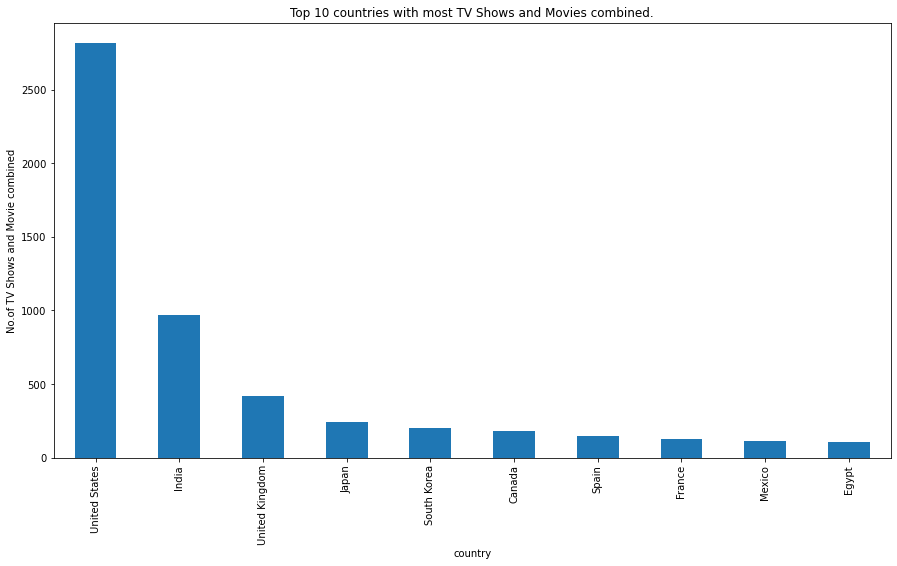

In [310]:
data[data["country"] != "None"][["type","country"]].groupby(["country"])["type"].count().sort_values(ascending=False).head(10).plot(
    kind="bar",
    figsize=(15,8),
    title="Top 10 countries with most TV Shows and Movies combined.",
    ylabel="No.of TV Shows and Movie combined"
)


### Top 10 countries with most Movies released.

<AxesSubplot:title={'center':'Top 10 countries With maximum movies released'}, xlabel='countries', ylabel='No. of Movies released'>

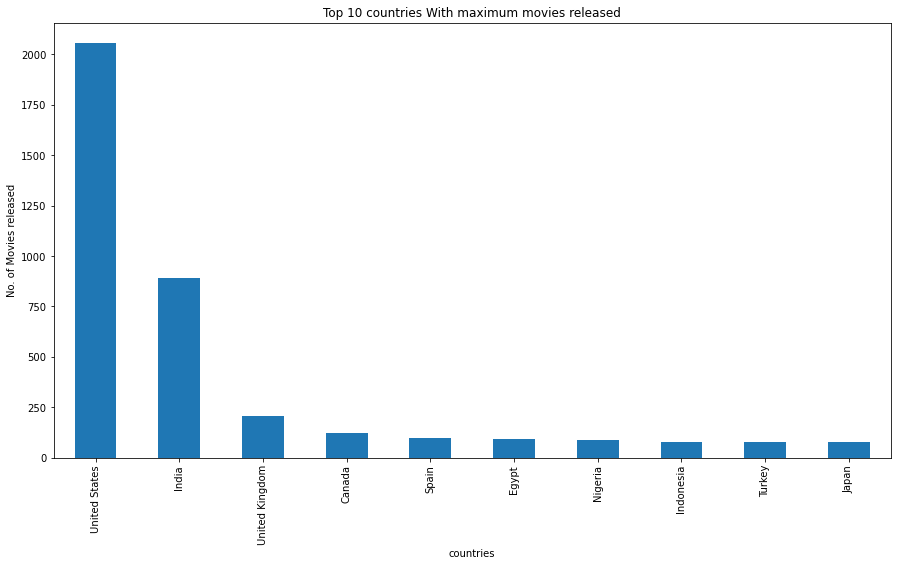

In [328]:
data[(data["country"] != "None") & (data["type"] == "Movie")][["type","country"]].groupby(["country"]).size().sort_values(ascending=False).head(10).plot(
    kind="bar",
    figsize=(15,8),
    title = "Top 10 countries With maximum movies released",
    ylabel = "No. of Movies released",
    xlabel = "countries"
    
)

### Top 10 countries with most TV Shows released.

<AxesSubplot:title={'center':'Top 10 countries With maximum TV Shows released'}, xlabel='countries', ylabel='No. of TV Show released'>

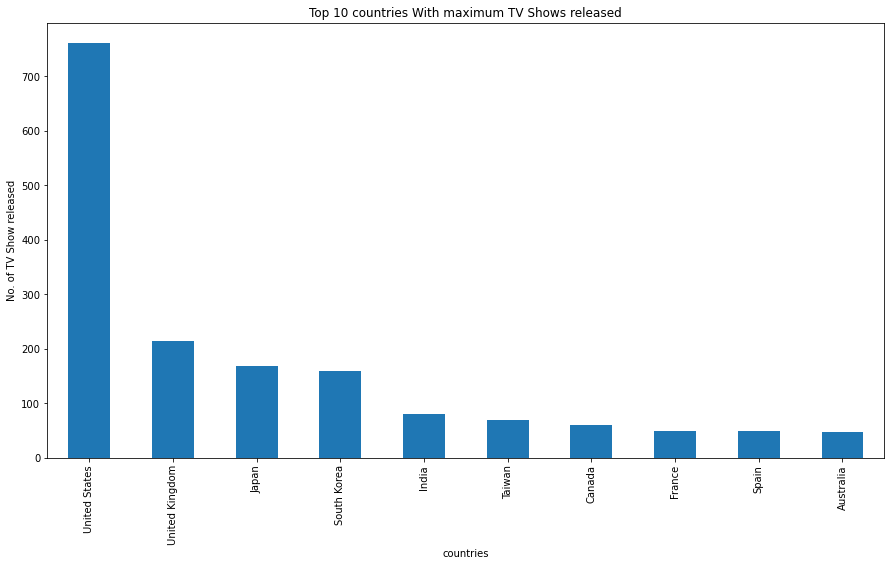

In [327]:
data[(data["country"] != "None") & (data["type"] == "TV Show")][["type","country"]].groupby(["country"]).size().sort_values(ascending=False).head(10).plot(
    kind="bar",
    figsize=(15,8),
    title = "Top 10 countries With maximum TV Shows released",
    ylabel = "No. of TV Show released",
    xlabel = "countries"
    
)